# ***Retail Store Optimization***

*CS-GY 6053 Foundation of Data Science, Fall 2023* | **Pratham Shah (ps4896), Sheel Patel (sjp9507), Qishan Feng (qf2050)**

##1. Mounting Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Importing Libraries
*We are using multiple models and evaluations metrics*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

##3. Loading the datasets

In [8]:
#The Bi-annual pedcount Dataset from NYC Open Data

ped_count_df = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/PedCountLocationsMay2015.csv")

In [9]:
#The Storefronts Vacant or not Dataset from NYC Open Data

storefront_df = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/Storefronts_Reported_Vacant_or_Not.csv")

<ipython-input-9-023d349daf91>:3: DtypeWarning: Columns (4,5,14,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  storefront_df = pd.read_csv("/content/drive/MyDrive/Retail Store Location Optimization/Storefronts_Reported_Vacant_or_Not.csv")


##4. Finding number of unique Streets
*Since the datasets contain several instances and observations of the same street, we find how many of them are unique*


In [10]:
ped_vals = ped_count_df['Street_Nam'].unique()

In [11]:
storefront_vals = storefront_df['PROPERTY STREET'].unique()

##5. Finding Common Streets
*Now, since the datasets have observations from multiple various streets from across NYC, we have to find which ones are common across them all.*

In [14]:
#Finding common streets between pedcount and storefront datasets

def find_common_elements(list1, list2):
    # Convert all elements to strings for consistent comparison

    str_list1 = [str(item).upper() for item in list1]
    str_list2 = [str(item).upper() for item in list2]

    # Find common elements
    common_elements = list(set(str_list1) & set(str_list2))


    return common_elements

ped_vals = [str(value) for value in ped_vals]
storefront_vals = [str(value) for value in storefront_vals]
common_strings = find_common_elements(ped_vals, storefront_vals)

print("Common strings:", len(common_strings))


Common strings: 63


In [15]:
#Printing the common streets

for string in common_strings:
  print(string)

ROOSEVELT AVENUE
BRIGHTON BEACH AVENUE
CHAMBERS STREET
SHEEPSHEAD BAY ROAD
GRAHAM AVENUE
WEST 14TH STREET
AUSTIN STREET
MERRICK BOULEVARD
BROADWAY
JACKSON AVENUE
JAY STREET
TRINITY PLACE
5TH AVENUE
MYRTLE AVENUE
CORTELYOU ROAD
ATLANTIC AVENUE
FULTON STREET
JAMAICA AVENUE
HILLSIDE AVENUE
BROAD STREET
FORSYTH STREET
FIFTH AVENUE
VICTORY BOULEVARD
FRESH POND ROAD
FLATBUSH AVENUE
LEXINGTON AVENUE
GRAND STREET
86TH STREET
QUEENS BOULEVARD
MAIN STREET
MOTT AVENUE
BELL BOULEVARD
WALL STREET
WEST 40TH STREET
FOREST AVENUE
BEDFORD AVENUE
WASHINGTON STREET
NEW DORP LANE
COURT STREET
EAST TREMONT AVENUE
YELLOWSTONE BOULEVARD
7TH AVENUE
CHURCH AVENUE
STEINWAY STREET
SUTPHIN BOULEVARD
EAST GUN HILL ROAD
EAST FORDHAM ROAD
PITKIN AVENUE
GRAND CONCOURSE
COLUMBUS AVENUE
KINGS HIGHWAY
RICHMOND HILL ROAD
EASTERN PARKWAY
PARK AVENUE
NORTHERN BOULEVARD
MADISON AVENUE
WHITE PLAINS ROAD
MONTAGUE STREET
DELANCEY STREET
EAST 14TH STREET
37TH AVENUE
OLD FULTON STREET
PRINCE STREET


In [16]:
#Similarly finding the non-common streets

def find_non_common_elements(list1, list2):
    # Convert all elements to strings for consistent comparison
    str_list1 = [str(item).upper() for item in list1]
    str_list2 = [str(item).upper() for item in list2]

    # Find common elements
    common_elements = set(str_list1) & set(str_list2)

    # Find non-common elements
    non_common_elements = set(str_list1) - common_elements

    return list(non_common_elements)

# Assuming ped_vals and storefront_vals are already defined
ped_vals = [str(value) for value in ped_vals]
storefront_vals = [str(value) for value in storefront_vals]

non_common_strings = find_non_common_elements(ped_vals, storefront_vals)

print("Non-common strings:", len(non_common_strings))
print("Non-common values:", non_common_strings)


Non-common strings: 32
Non-common values: ['UNIVERSITY HEIGHTS BRIDGE', 'EAST 8TH STREET', 'QUEENSBORO BRIDGE', 'THIRD AVENUE BRIDGE', 'WEST 125TH STREET', 'WILLIS AVENUE BRIDGE', 'BROADWAY BRIDGE', 'VANBRUNT STREET', 'EAST 42ND STREET', 'MANHATTAN BRIDGE  SOUTH PATH', 'BROOKLYN BRIDGE', '165TH STREET', 'WEST 47TH STREET', 'TRIBOROUGH BRIDGE (MANHATTAN SPAN)', 'MADISON AVENUE BRIDGE', 'SIXTH AVENUE', 'WEST 181ST STREET', '145TH STREET BRIDGE', '82ND STREET', 'WARDS ISLAND BRIDGE', 'HUDSON RIVER GREENWAY', 'PEDESTRIAN WALKWAY FROM FERRY TERMINAL', 'SECOND AVENUE', 'QUEENS PLAZA NORTH & SOUTH', 'MANHATTAN BRIDGE  NORTH PATH', 'MACOMBS DAM BRIDGE', 'SEVENTH AVENUE', 'THIRD AVENUE', 'WEST 34TH STREET', 'EIGHTH AVENUE', 'EAST 161ST STREET', 'WILLIAMSBURG BRIDGE']


In [17]:
print("Common values in the common_location_feature:", common_strings)

Common values in the common_location_feature: ['ROOSEVELT AVENUE', 'BRIGHTON BEACH AVENUE', 'CHAMBERS STREET', 'SHEEPSHEAD BAY ROAD', 'GRAHAM AVENUE', 'WEST 14TH STREET', 'AUSTIN STREET', 'MERRICK BOULEVARD', 'BROADWAY', 'JACKSON AVENUE', 'JAY STREET', 'TRINITY PLACE', '5TH AVENUE', 'MYRTLE AVENUE', 'CORTELYOU ROAD', 'ATLANTIC AVENUE', 'FULTON STREET', 'JAMAICA AVENUE', 'HILLSIDE AVENUE', 'BROAD STREET', 'FORSYTH STREET', 'FIFTH AVENUE', 'VICTORY BOULEVARD', 'FRESH POND ROAD', 'FLATBUSH AVENUE', 'LEXINGTON AVENUE', 'GRAND STREET', '86TH STREET', 'QUEENS BOULEVARD', 'MAIN STREET', 'MOTT AVENUE', 'BELL BOULEVARD', 'WALL STREET', 'WEST 40TH STREET', 'FOREST AVENUE', 'BEDFORD AVENUE', 'WASHINGTON STREET', 'NEW DORP LANE', 'COURT STREET', 'EAST TREMONT AVENUE', 'YELLOWSTONE BOULEVARD', '7TH AVENUE', 'CHURCH AVENUE', 'STEINWAY STREET', 'SUTPHIN BOULEVARD', 'EAST GUN HILL ROAD', 'EAST FORDHAM ROAD', 'PITKIN AVENUE', 'GRAND CONCOURSE', 'COLUMBUS AVENUE', 'KINGS HIGHWAY', 'RICHMOND HILL ROAD', 

##6. Flitering Datasets based on common values
*We find the common streets between the 3 datasets and create new dataframes that only have the common street names and their corresponding features*

In [18]:
import pandas as pd

def find_common_elements(list1, list2):
    # Convert all elements to strings for consistent comparison
    str_list1 = [str(item).strip().upper() for item in list1]
    str_list2 = [str(item).strip().upper() for item in list2]

    # Find common elements
    common_elements = list(set(str_list1) & set(str_list2))

    return common_elements

# Load datasets
df1 = pd.read_csv('/content/drive/MyDrive/Retail Store Location Optimization/PedCountLocationsMay2015.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Retail Store Location Optimization/Storefronts_Reported_Vacant_or_Not.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Retail Store Location Optimization/Retail_Food_Stores.csv')

ped_vals = df1['Street_Nam'].tolist()
storefront_vals = df2['PROPERTY STREET'].tolist()
food_store_vals = df3['Street Name'].tolist()

# Find common values between ped_vals and storefront_vals
common_values_ped_storefront = find_common_elements(ped_vals, storefront_vals)

# Find common values between common_values_ped_storefront and food_store_vals
common_values_all = find_common_elements(common_values_ped_storefront, food_store_vals)

print(common_values_all)

# Convert common_values_all to a Series
common_values_series = pd.Series(common_values_all)

# Filter datasets based on common values
df1_common = df1[df1['Street_Nam'].astype(str).str.strip().str.upper().isin(common_values_series)].copy()
print(df1_common.head())
df2_common = df2[df2['PROPERTY STREET'].astype(str).str.strip().str.upper().isin(common_values_series)].copy()
print(df2_common.head())
df3_common = df3[df3['Street Name'].astype(str).str.strip().str.upper().isin(common_values_series)].copy()
print(df3_common.head())


# Save the filtered datasets to new CSV files or use them as needed
df1_common.to_csv('df1_common.csv', index=False)
df2_common.to_csv('df2_common.csv', index=False)
df3_common.to_csv('df3_common.csv', index=False)

df1_common.rename(columns={'Street_Nam': 'Street'}, inplace=True)
df2_common.rename(columns={'PROPERTY STREET': 'Street'}, inplace=True)
df3_common.rename(columns={'Street Name': 'Street'}, inplace=True)


print("Unique values in df1_common 'Street' column:")
print(df1_common['Street'].unique())

print("Unique values in df2_common 'Street' column:")
print(df2_common['Street'].unique())

print("Unique values in df3_common 'Street' column:")
print(df3_common['Street'].unique())


<ipython-input-18-6b7eef7bb661>:17: DtypeWarning: Columns (4,5,14,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Retail Store Location Optimization/Storefronts_Reported_Vacant_or_Not.csv')


['ROOSEVELT AVENUE', 'BRIGHTON BEACH AVENUE', 'MERRICK BOULEVARD', 'SHEEPSHEAD BAY ROAD', 'GRAHAM AVENUE', 'BROADWAY', 'AUSTIN STREET', 'JACKSON AVENUE', 'JAY STREET', '5TH AVENUE', 'MYRTLE AVENUE', 'CORTELYOU ROAD', 'ATLANTIC AVENUE', 'FULTON STREET', 'FORSYTH STREET', 'HILLSIDE AVENUE', 'BROAD STREET', 'JAMAICA AVENUE', 'FIFTH AVENUE', 'VICTORY BOULEVARD', 'FRESH POND ROAD', 'FLATBUSH AVENUE', 'LEXINGTON AVENUE', 'GRAND STREET', '86TH STREET', 'QUEENS BOULEVARD', 'MAIN STREET', 'MOTT AVENUE', 'WALL STREET', 'WEST 40TH STREET', 'FOREST AVENUE', 'BEDFORD AVENUE', 'WASHINGTON STREET', 'NEW DORP LANE', 'COURT STREET', 'EAST TREMONT AVENUE', 'YELLOWSTONE BOULEVARD', '7TH AVENUE', 'CHURCH AVENUE', 'STEINWAY STREET', 'EAST GUN HILL ROAD', 'PITKIN AVENUE', 'GRAND CONCOURSE', 'KINGS HIGHWAY', 'COLUMBUS AVENUE', 'EASTERN PARKWAY', 'PARK AVENUE', 'NORTHERN BOULEVARD', 'MADISON AVENUE', 'WHITE PLAINS ROAD', 'MONTAGUE STREET', 'DELANCEY STREET', 'EAST 14TH STREET', '37TH AVENUE', 'PRINCE STREET']

In [19]:
df1_common['Street'].nunique()

55

In [20]:
repeating_elements = df1_common[df1_common['Street'].duplicated(keep=False)]
print("Repeating elements:")
print(repeating_elements['Street'])

Repeating elements:
0             Broadway
8           5th Avenue
9           5th Avenue
19     Flatbush Avenue
20     Flatbush Avenue
21     Flatbush Avenue
22       Fulton Street
28       Myrtle Avenue
35            Broadway
36            Broadway
44        Fifth Avenue
46       Fulton Street
47       Fulton Street
48    Lexington Avenue
49      Madison Avenue
61    Lexington Avenue
63      Madison Avenue
64        Fifth Avenue
67            Broadway
78      Jamaica Avenue
79      Jamaica Avenue
80      Jamaica Avenue
84       Myrtle Avenue
85       Myrtle Avenue
88    Queens Boulevard
89    Queens Boulevard
Name: Street, dtype: object


In [21]:
#Now, the pedcounts dataset has multiple instances of certain streets that are repeating. So, we merge the pedcounts of these streets in a single respective observation.

df1_common['Street'] = df1_common['Street'].str.strip()  # Remove leading/trailing whitespaces

# Group by 'Street' and sum corresponding column values
df1_merged = df1_common.groupby('Street').sum().reset_index()

# Print the merged DataFrame
print(df1_merged)


                   Street  OBJECTID  LOC  May07_AM  May07_PM  May07_MD  \
0             37th Avenue        72   72    1002.0    4106.0    3142.0   
1              5th Avenue        19   19    1360.0    8147.0    6579.0   
2              7th Avenue        11   11    2345.0    4089.0    2519.0   
3             86th Street        12   12     983.0    4193.0    3886.0   
4         Atlantic Avenue        13   13     357.0     889.0     836.0   
5           Austin Street        74   74     622.0    4356.0    2227.0   
6          Bedford Avenue        14   14    1852.0    4462.0    3432.0   
7   Brighton Beach Avenue        15   15    1204.0    5968.0    5178.0   
8            Broad Street        35   35    3469.0    3992.0     599.0   
9                Broadway       142  142   10111.0   30462.0   18595.0   
10          Church Avenue        16   16    2105.0    4562.0    1703.0   
11        Columbus Avenue        39   39    1071.0    3037.0    3500.0   
12         Cortelyou Road        17   

<ipython-input-21-2e361949d75b>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_merged = df1_common.groupby('Street').sum().reset_index()


In [22]:
df2_common

,Reporting Year,BOROUGH-BLOCK-LOT,PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS,BOROUGH,ZIP CODE,SOLD DATE,VACANT ON 12/31,CONSTRUCTION REPORTED,VACANT 6/30 OR DATE SOLD IF EARLIER,PRIMARY BUSINESS ACTIVITY,...,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA,NBHD
1,2019 and 2020,1000050010,115 BROAD STREET,MANHATTAN,10004,NaN,NO,NaN,YES,OTHER,...,10004,40.702776,-74.010722,1.0,1.0,9,1000007.0,1000050010,MN25,Battery Park City-Lower Manhattan
2,2019 and 2020,1000050010,115 BROAD STREET,MANHATTAN,10004,NaN,NO,NaN,YES,RETAIL,...,10004,40.702776,-74.010722,1.0,1.0,9,1000007.0,1000050010,MN25,Battery Park City-Lower Manhattan
3,2019 and 2020,1000050010,115 BROAD STREET,MANHATTAN,10004,NaN,YES,NaN,YES,FOOD SERVICES,...,10004,40.702776,-74.010722,1.0,1.0,9,1000007.0,1000050010,MN25,Battery Park City-Lower Manhattan
4,2019 and 2020,1000050010,115 BROAD STREET,MANHATTAN,10004,NaN,NO,NaN,YES,EDUCATIONAL SERVICES,...,10004,40.702776,-74.010722,1.0,1.0,9,1000007.0,1000050010,MN25,Battery Park City-Lower Manhattan
10,2019 and 2020,1000070031,105 BROAD STREET,MANHATTAN,10004,NaN,NO,NaN,NaN,RETAIL,...,10004,40.703172,-74.011354,1.0,1.0,9,1000012.0,1000070031,MN25,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278320,2022 and 2023,5080280067,140 MAIN STREET,STATEN ISLAND,10307.0,NaN,NO,NaN,NaN,MISCELLANEOUS OTHER SERVICE,...,10307.0,40.511303,-74.249603,503.0,51.0,24800.0,5095773,5080280067,SI0305,Tottenville-Charleston
278334,2022 and 2023,5080470023,241 Main St,STATEN ISLAND,10307.0,NaN,YES,NaN,NaN,NO BUSINESS ACTIVITY IDENTIFIED,...,10307.0,40.509377,-74.246762,503.0,51.0,24800.0,5089267,5080470023,SI0305,Tottenville-Charleston
278335,2022 and 2023,5080470023,241 Main St,STATEN ISLAND,10307.0,NaN,YES,NaN,NaN,NO BUSINESS ACTIVITY IDENTIFIED,...,10307.0,40.509377,-74.246762,503.0,51.0,24800.0,5089267,5080470023,SI0305,Tottenville-Charleston
278336,2022 and 2023,5080470031,229 MAIN STREET,STATEN ISLAND,10307.0,NaN,NO,NaN,NaN,OTHER,...,10307.0,40.509772,-74.246972,503.0,51.0,24800.0,5104957,5080470031,SI0305,Tottenville-Charleston


In [23]:
df2_common['Street'].nunique()

56

In [24]:
#Since the storefronts dataset has a lot of features, we need to filter out only the relevant ones.

useful_columns=['Street', 'VACANT ON 12/31']
df2_common_new=df2_common[useful_columns]
print(df2_common_new)

              Street VACANT ON 12/31
1       BROAD STREET              NO
2       BROAD STREET              NO
3       BROAD STREET             YES
4       BROAD STREET              NO
10      BROAD STREET              NO
...              ...             ...
278320   MAIN STREET              NO
278334   MAIN STREET             YES
278335   MAIN STREET             YES
278336   MAIN STREET              NO
278337   MAIN STREET             YES

[61503 rows x 2 columns]


##7. Finding the number of Vacant Storefronts
*Now, since the streets can be repeating, as there are multiple storefronts on each street, we find how many are vacant and how many aren't by taking a count*

In [25]:
result = df2_common_new.groupby(['Street', 'VACANT ON 12/31']).size().unstack(fill_value=0)

# Print the result
print(result)

VACANT ON 12/31          NO   YES
Street                           
37TH AVENUE               3     0
5TH AVENUE                4     0
7TH AVENUE                0     3
86TH STREET               0     1
ATLANTIC AVENUE        1119   135
AUSTIN STREET           631    36
BEDFORD AVENUE          531    96
BRIGHTON BEACH AVENUE   609    49
BROAD STREET            199    54
BROADWAY               9662  1356
CHURCH AVENUE          1077    94
COLUMBUS AVENUE         865    80
CORTELYOU ROAD          113    16
COURT STREET            592    64
DELANCEY STREET         269    32
EAST 14TH STREET          3     1
EAST GUN HILL ROAD      540    33
EAST TREMONT AVENUE    1484   108
EASTERN PARKWAY         238    24
FIFTH AVENUE             32     5
FLATBUSH AVENUE        1892   239
FOREST AVENUE          1077    92
FORSYTH STREET          128    14
FRESH POND ROAD         357    32
FULTON STREET          1589   226
GRAHAM AVENUE           524    43
GRAND CONCOURSE        1318    72
GRAND STREET  

##8. Finding number of retail stores on the streets
*Finding the number of already established stores on our sample streets using the retail store dataset*

In [27]:
value_counts = df3_common['Street'].value_counts()

# Create a new DataFrame with unique values and their counts
unique_values_df3 = pd.DataFrame({'Street': value_counts.index, 'Count': value_counts.values})

# Display the new DataFrame
print(unique_values_df3)

                   Street  Count
0                BROADWAY    599
1             MAIN STREET    145
2           FULTON STREET     49
3         GRAND CONCOURSE     43
4       WHITE PLAINS ROAD     41
5              5TH AVENUE     31
6             86TH STREET     26
7          JAMAICA AVENUE     23
8         FLATBUSH AVENUE     20
9              7TH AVENUE     19
10          CHURCH AVENUE     18
11          KINGS HIGHWAY     17
12            37TH AVENUE     16
13           GRAND STREET     13
14        HILLSIDE AVENUE     13
15       LEXINGTON AVENUE     13
16            PARK AVENUE     11
17    EAST TREMONT AVENUE     10
18        STEINWAY STREET     10
19          PITKIN AVENUE      9
20          FOREST AVENUE      9
21       ROOSEVELT AVENUE      9
22         MADISON AVENUE      8
23          MYRTLE AVENUE      8
24             JAY STREET      7
25         CORTELYOU ROAD      6
26           COURT STREET      5
27         BEDFORD AVENUE      5
28         JACKSON AVENUE      4
29        

##9. Creating a column of total pedcounts
The pedcount dataset has the pedcounts from 2007 to 2022, so we need to merge them into 1 column that has the sum of these all.

In [28]:
df1_merged['Sum_Columns'] = df1_merged.sum(axis=1)

# Display the DataFrame with the new column
print(df1_merged)


                   Street  OBJECTID  LOC  May07_AM  May07_PM  May07_MD  \
0             37th Avenue        72   72    1002.0    4106.0    3142.0   
1              5th Avenue        19   19    1360.0    8147.0    6579.0   
2              7th Avenue        11   11    2345.0    4089.0    2519.0   
3             86th Street        12   12     983.0    4193.0    3886.0   
4         Atlantic Avenue        13   13     357.0     889.0     836.0   
5           Austin Street        74   74     622.0    4356.0    2227.0   
6          Bedford Avenue        14   14    1852.0    4462.0    3432.0   
7   Brighton Beach Avenue        15   15    1204.0    5968.0    5178.0   
8            Broad Street        35   35    3469.0    3992.0     599.0   
9                Broadway       142  142   10111.0   30462.0   18595.0   
10          Church Avenue        16   16    2105.0    4562.0    1703.0   
11        Columbus Avenue        39   39    1071.0    3037.0    3500.0   
12         Cortelyou Road        17   

<ipython-input-28-02a8f80277f4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1_merged['Sum_Columns'] = df1_merged.sum(axis=1)


In [ ]:
#Not used, but if we wanted only the pedcounts for 2022, we could have done this.

'''df1_merged['Sum_Columns_2022'] = df1_merged['May22_AM']+df1_merged['May22_pM']+df1_merged['May22_MD']

# Display the DataFrame with the new column
print(df1_merged)'''


                   Street  OBJECTID  LOC  May07_AM  May07_PM  May07_MD  \
0             37TH AVENUE        72   72    1002.0    4106.0    3142.0   
1              5TH AVENUE        19   19    1360.0    8147.0    6579.0   
2              7TH AVENUE        11   11    2345.0    4089.0    2519.0   
3             86TH STREET        12   12     983.0    4193.0    3886.0   
4         ATLANTIC AVENUE        13   13     357.0     889.0     836.0   
5           AUSTIN STREET        74   74     622.0    4356.0    2227.0   
6          BEDFORD AVENUE        14   14    1852.0    4462.0    3432.0   
7   BRIGHTON BEACH AVENUE        15   15    1204.0    5968.0    5178.0   
8            BROAD STREET        35   35    3469.0    3992.0     599.0   
9                BROADWAY       142  142   10111.0   30462.0   18595.0   
10          CHURCH AVENUE        16   16    2105.0    4562.0    1703.0   
11        COLUMBUS AVENUE        39   39    1071.0    3037.0    3500.0   
12         CORTELYOU ROAD        17   

In [46]:
#keeping only the sum column

good_columns=['Street', 'Sum_Columns']
df1_final=df1_merged[good_columns]
df1_final['Street'] = df1_final['Street'].str.upper()
print(df1_final)

                   Street  Sum_Columns
0             37TH AVENUE     256040.0
1              5TH AVENUE     520183.0
2              7TH AVENUE     272486.0
3             86TH STREET     298937.0
4         ATLANTIC AVENUE      93734.0
5           AUSTIN STREET     247545.0
6          BEDFORD AVENUE     384888.0
7   BRIGHTON BEACH AVENUE     349299.0
8            BROAD STREET     323518.0
9                BROADWAY    1943869.0
10          CHURCH AVENUE     241141.0
11        COLUMBUS AVENUE     240863.0
12         CORTELYOU ROAD     180455.0
13           COURT STREET     280961.0
14        DELANCEY STREET     219381.0
15       EAST 14TH STREET     673523.0
16     EAST GUN HILL ROAD     177018.0
17    EAST TREMONT AVENUE     191296.0
18        EASTERN PARKWAY     161389.0
19           FIFTH AVENUE    2044182.0
20        FLATBUSH AVENUE     438936.0
21          FOREST AVENUE      18622.0
22         FORSYTH STREET     275527.0
23        FRESH POND ROAD      48390.0
24          FULTON STREET

<ipython-input-46-4797908f83be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_final['Street'] = df1_final['Street'].str.upper()


##10. Merging the datasets
*Now that we have done the preprocessing part on all the datasets, it is time to merge them and create 1 final dataframe.*

In [48]:
final_df=pd.merge(df1_final, result, on='Street')

In [49]:
final_df

,Street,Sum_Columns,NO,YES
0,37TH AVENUE,256040.0,3,0
1,5TH AVENUE,520183.0,4,0
2,7TH AVENUE,272486.0,0,3
3,86TH STREET,298937.0,0,1
4,ATLANTIC AVENUE,93734.0,1119,135
5,AUSTIN STREET,247545.0,631,36
6,BEDFORD AVENUE,384888.0,531,96
7,BRIGHTON BEACH AVENUE,349299.0,609,49
8,BROAD STREET,323518.0,199,54
9,BROADWAY,1943869.0,9662,1356


In [50]:
final_df['Retail Stores'] = final_df['NO']+final_df['YES']

In [51]:
final_df.rename(columns={'Sum_Columns': 'Pedcount'}, inplace=True)

In [52]:
final_df

,Street,Pedcount,NO,YES,Retail Stores
0,37TH AVENUE,256040.0,3,0,3
1,5TH AVENUE,520183.0,4,0,4
2,7TH AVENUE,272486.0,0,3,3
3,86TH STREET,298937.0,0,1,1
4,ATLANTIC AVENUE,93734.0,1119,135,1254
5,AUSTIN STREET,247545.0,631,36,667
6,BEDFORD AVENUE,384888.0,531,96,627
7,BRIGHTON BEACH AVENUE,349299.0,609,49,658
8,BROAD STREET,323518.0,199,54,253
9,BROADWAY,1943869.0,9662,1356,11018


##11. Modelling and Normalizing
Since our final dataframes has very varying numbers, we need to normalize it to get relevant and appropriate modelling.

Giving weights and normalizing to give a score

In [53]:
import pandas as pd

# Define weights for each criterion
#We feel that the number of pedcounts and the number of retail stores that are already there have more importance than how many of them are vacant.

weights = {'Pedcount': 0.4, 'Retail Stores': 0.4, 'YES': 0.2}

# Normalize data
df_normalized = final_df.copy()
for column in ['Pedcount', 'Retail Stores', 'YES']:
    df_normalized[column] = (final_df[column] - final_df[column].min()) / (final_df[column].max() - final_df[column].min())

# Calculate combined score
df_normalized['CombinedScore'] = (
    weights['Pedcount'] * df_normalized['Pedcount'] +
    weights['Retail Stores'] * df_normalized['Retail Stores'] +
    weights['YES'] * (1 - df_normalized['YES'])  # Reverse the VacantShops score, as lower vacancy is better
)

# Rank locations based on the combined score
df_ranked = df_normalized.sort_values(by='CombinedScore', ascending=False)

# Display the ranked DataFrame
print(df_ranked)


                   Street  Pedcount    NO       YES  Retail Stores  \
9                BROADWAY  0.950663  9662  1.000000       1.000000   
19           FIFTH AVENUE  1.000000    32  0.003687       0.003268   
24          FULTON STREET  0.615476  1589  0.166667       0.164655   
33       LEXINGTON AVENUE  0.532308  2261  0.258112       0.236907   
46       ROOSEVELT AVENUE  0.341405  2492  0.101770       0.238631   
30         JAMAICA AVENUE  0.361093  2492  0.177729       0.247980   
34         MADISON AVENUE  0.273760  2547  0.303097       0.268403   
15       EAST 14TH STREET  0.325873     3  0.000737       0.000272   
35            MAIN STREET  0.224704  1486  0.099558       0.147045   
39          MYRTLE AVENUE  0.256365  1146  0.103245       0.116638   
20        FLATBUSH AVENUE  0.210497  1892  0.176254       0.193338   
42            PARK AVENUE  0.233536  1380  0.168879       0.145956   
50            WALL STREET  0.291055   108  0.023599       0.012617   
45       QUEENS BOUL

Using Random Forest Regressor

In [68]:
# Define features and target
X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

# Predict on the test set
y_pred_rfr = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rfr)
print(f'Mean Squared Error: {mse}')

# Now, you can use the trained model to predict suitability scores for each location in your dataset.
df_ranked['PredictedScore'] = model1.predict(df_ranked[['Pedcount', 'Retail Stores', 'YES']])

Mean Squared Error: 0.0001219097588896849


In [69]:
rfr_r2 = r2_score(y_test, y_pred_rfr)
print(f'R-squared: {rfr_r2}')


rfr_mae = mean_absolute_error(y_test, y_pred_rfr)
print(f'Mean Absolute Error: {rfr_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rfr_mape = mean_absolute_percentage_error(y_test, y_pred_rfr)
print(f'Mean Absolute Percentage Error: {rfr_mape}%')


rfr_evs = explained_variance_score(y_test, y_pred_rfr)
print(f'Explained Variance Score: {rfr_evs}')

rfr_mse = mean_squared_error(y_test, y_pred_rfr)
print(f'Mean Squared Error: {rfr_mse}')

R-squared: 0.9564637784608891
Mean Absolute Error: 0.009102137575107137
Mean Absolute Percentage Error: 3.261816836148959%
Explained Variance Score: 0.9597954341709749
Mean Squared Error: 0.0001219097588896849


In [57]:
df_ranked

,Street,Pedcount,NO,YES,Retail Stores,CombinedScore,PredictedScore
9,BROADWAY,0.950663,9662,1.000000,1.000000,0.780265,0.683893
19,FIFTH AVENUE,1.000000,32,0.003687,0.003268,0.600570,0.570069
24,FULTON STREET,0.615476,1589,0.166667,0.164655,0.478719,0.453900
33,LEXINGTON AVENUE,0.532308,2261,0.258112,0.236907,0.456063,0.453052
46,ROOSEVELT AVENUE,0.341405,2492,0.101770,0.238631,0.411660,0.383319
30,JAMAICA AVENUE,0.361093,2492,0.177729,0.247980,0.408084,0.390976
34,MADISON AVENUE,0.273760,2547,0.303097,0.268403,0.356246,0.352131
15,EAST 14TH STREET,0.325873,3,0.000737,0.000272,0.330311,0.348183
35,MAIN STREET,0.224704,1486,0.099558,0.147045,0.328788,0.325715
39,MYRTLE AVENUE,0.256365,1146,0.103245,0.116638,0.328552,0.326255


Using Linear Regression

In [70]:
#Using Linear Regression

X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = model2.predict(X_test)

lr_r2 = r2_score(y_test, y_pred_lr)
print(f'R-squared: {lr_r2}')



lr_mae = mean_absolute_error(y_test, y_pred_lr)
print(f'Mean Absolute Error: {lr_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

lr_mape = mean_absolute_percentage_error(y_test, y_pred_lr)
print(f'Mean Absolute Percentage Error: {lr_mape}%')


lr_evs = explained_variance_score(y_test, y_pred_lr)
print(f'Explained Variance Score: {lr_evs}')

lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error: {lr_mse}')

R-squared: 1.0
Mean Absolute Error: 1.0092936587501423e-17
Mean Absolute Percentage Error: 2.8357006273304598e-15%
Explained Variance Score: 1.0
Mean Squared Error: 5.602705292762868e-34


Using Gradient Boosting Regressor

In [71]:
X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = GradientBoostingRegressor()

model3.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = model3.predict(X_test)

gbr_r2 = r2_score(y_test, y_pred_gbr)
print(f'R-squared: {gbr_r2}')

from sklearn.metrics import mean_absolute_error

gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
print(f'Mean Absolute Error: {gbr_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

gbr_mape = mean_absolute_percentage_error(y_test, y_pred_gbr)
print(f'Mean Absolute Percentage Error: {gbr_mape}%')

from sklearn.metrics import explained_variance_score

gbr_evs = explained_variance_score(y_test, y_pred_gbr)
print(f'Explained Variance Score: {gbr_evs}')

gbr_mse = mean_squared_error(y_test, y_pred_gbr)
print(f'Mean Squared Error: {gbr_mse}')

R-squared: 0.9843768235539212
Mean Absolute Error: 0.0054489021290370365
Mean Absolute Percentage Error: 2.1087672739421666%
Explained Variance Score: 0.990771974520568
Mean Squared Error: 4.374788638746355e-05


Using XGBoost Regressor

In [72]:

X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model4 = XGBRegressor()

model4.fit(X_train, y_train)

sample_test=[[0.245361, 0.066666, 0.059866]]

sample_y= [[0.22450764]]

# Predict on the test set
y_pred_xgb = model4.predict(X_test)

xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f'R-squared: {xgb_r2}')

from sklearn.metrics import mean_absolute_error

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error: {xgb_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

xgb_mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f'Mean Absolute Percentage Error: {xgb_mape}%')

from sklearn.metrics import explained_variance_score

xgb_evs = explained_variance_score(y_test, y_pred_xgb)
print(f'Explained Variance Score: {xgb_evs}')

xgb_mse = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {xgb_mse}')

R-squared: 0.9679394269309273
Mean Absolute Error: 0.007282313611549455
Mean Absolute Percentage Error: 2.741239205857562%
Explained Variance Score: 0.9734348575868192
Mean Squared Error: 8.977574521951981e-05


Using Ridge Regression

In [73]:
X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model5 = Ridge()

model5.fit(X_train, y_train)

# Predict on the test set
y_pred_r = model5.predict(X_test)

r_r2 = r2_score(y_test, y_pred_r)
print(f'R-squared: {r_r2}')

from sklearn.metrics import mean_absolute_error

r_mae = mean_absolute_error(y_test, y_pred_r)
print(f'Mean Absolute Error: {r_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

r_mape = mean_absolute_percentage_error(y_test, y_pred_r)
print(f'Mean Absolute Percentage Error: {r_mape}%')

from sklearn.metrics import explained_variance_score

r_evs = explained_variance_score(y_test, y_pred_r)
print(f'Explained Variance Score: {r_evs}')

r_mse = mean_squared_error(y_test, y_pred_r)
print(f'Mean Squared Error: {r_mse}')

R-squared: 0.848635837357505
Mean Absolute Error: 0.017747485911388833
Mean Absolute Percentage Error: 6.7358656137169275%
Explained Variance Score: 0.8760958761241682
Mean Squared Error: 0.00042384864648183903


Using Support Vector Regressor

In [74]:

X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model6 = SVR()

model6.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = model6.predict(X_test)

svr_r2 = r2_score(y_test, y_pred_svr)
print(f'R-squared: {svr_r2}')

from sklearn.metrics import mean_absolute_error

svr_mae = mean_absolute_error(y_test, y_pred_svr)
print(f'Mean Absolute Error: {svr_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

svr_mape = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f'Mean Absolute Percentage Error: {svr_mape}%')

from sklearn.metrics import explained_variance_score

svr_evs = explained_variance_score(y_test, y_pred_svr)
print(f'Explained Variance Score: {svr_evs}')

svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error: {svr_mse}')

R-squared: -1.0838440857156808
Mean Absolute Error: 0.07510504833074065
Mean Absolute Percentage Error: 28.93859335327833%
Explained Variance Score: 0.9305782208565813
Mean Squared Error: 0.0058351625628576065


##12. Visualizations

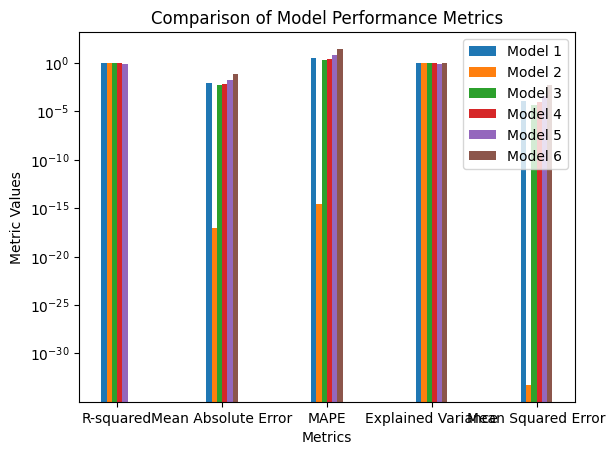

In [75]:

# Metrics for Model 1
metrics_rfr = [rfr_r2,rfr_mae,rfr_mape,rfr_evs,rfr_mse]

# Metrics for Model 2
metrics_lr = [lr_r2,lr_mae,lr_mape,lr_evs,lr_mse]

# Metrics for Model 3, Model 4, Model 5
metrics_gbr = [gbr_r2,gbr_mae,gbr_mape,gbr_evs,gbr_mse]
metrics_xgb = [xgb_r2,xgb_mae,xgb_mape,xgb_evs,xgb_mse]
metrics_r = [r_r2,r_mae,r_mape,r_evs,r_mse]
metrics_svr = [svr_r2,svr_mae,svr_mape,svr_evs,svr_mse]


# Metrics names
metrics_names = ['R-squared', 'Mean Absolute Error', 'MAPE', 'Explained Variance', 'Mean Squared Error']

# Combine metrics for all models
all_metrics = [metrics_rfr, metrics_lr, metrics_gbr, metrics_xgb, metrics_r,metrics_svr]

# Bar width
bar_width = 0.05

# Set up positions for the bars
bar_positions = np.arange(len(metrics_names))

# Create the bar chart for each model
for i, model_metrics in enumerate(all_metrics):
    plt.bar(bar_positions + i * bar_width, model_metrics, width=bar_width, label=f'Model {i+1}')

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Metric Values')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(bar_positions + bar_width * (len(all_metrics) - 1) / 2, metrics_names)
plt.yscale('log')
plt.legend()

# Display the plot
plt.show()


In [64]:
#Now let us try with our own values.

X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()

model.fit(X_train, y_train)

X_test=[[0.245361, 0.066666, 0.059866]]

y_test= [[0.22450764]]

# Predict on the test set
y_pred = model.predict(X_test)

xgb_r2 = r2_score(y_test, y_pred)
print(f'R-squared: {xgb_r2}')

from sklearn.metrics import mean_absolute_error

xgb_mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {xgb_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

xgb_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {xgb_mape}%')

from sklearn.metrics import explained_variance_score

xgb_evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {xgb_evs}')

xgb_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {xgb_mse}')

R-squared: nan
Mean Absolute Error: 0.0956067043584442
Mean Absolute Percentage Error: 42.58505606243253%
Explained Variance Score: 1.0
Mean Squared Error: 0.009140641918282955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [65]:
X = df_ranked[['Pedcount', 'Retail Stores', 'YES']]
y = df_ranked['CombinedScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

X_test=[[0.245361, 0.066666, 0.059866]]

y_test= [[0.22450764]]

# Predict on the test set
y_pred = model.predict(X_test)

gbr_r2 = r2_score(y_test, y_pred)
print(f'R-squared: {gbr_r2}')

from sklearn.metrics import mean_absolute_error

gbr_mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {gbr_mae}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

gbr_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {gbr_mape}%')

from sklearn.metrics import explained_variance_score

gbr_evs = explained_variance_score(y_test, y_pred)
print(f'Explained Variance Score: {gbr_evs}')

gbr_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {gbr_mse}')

R-squared: nan
Mean Absolute Error: 0.08534977138492283
Mean Absolute Percentage Error: 38.016421795232816%
Explained Variance Score: 1.0
Mean Squared Error: 0.0072845834754585925


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


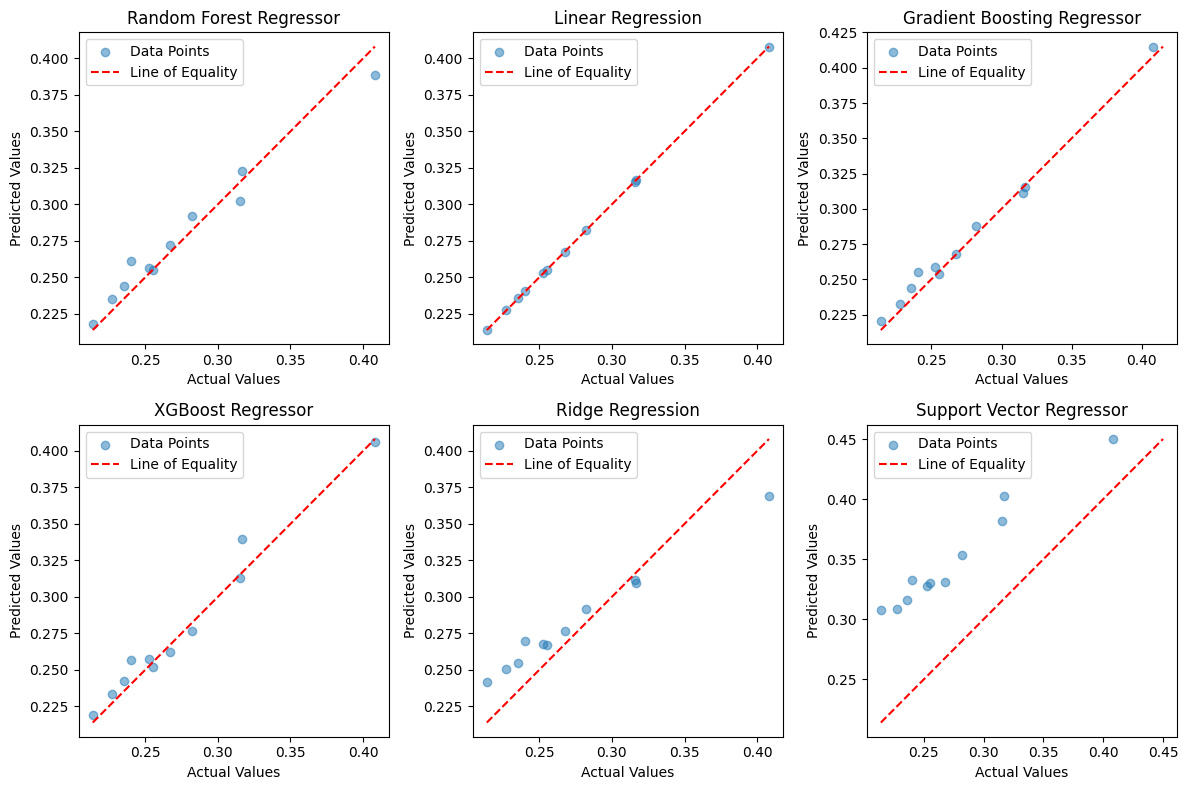

In [77]:
#Now let us plot the actual vs predicted values for all 6 of our models.

import matplotlib.pyplot as plt
import numpy as np

model_names = ["Random Forest Regressor", "Linear Regression", "Gradient Boosting Regressor", "XGBoost Regressor", "Ridge Regression", "Support Vector Regressor"]
predictions = [y_pred_rfr, y_pred_lr, y_pred_gbr, y_pred_xgb, y_pred_r, y_pred_svr]

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the 2D array of axes for easy indexing
axes = axes.flatten()

for i, (model_name, prediction) in enumerate(zip(model_names, predictions)):
    # Scatter plot of actual vs predicted values
    axes[i].scatter(y_test, prediction, alpha=0.5, label="Data Points")

    # Line of equality
    min_val = min(np.min(y_test), np.min(prediction))
    max_val = max(np.max(y_test), np.max(prediction))
    axes[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Line of Equality")

    # Title and axis labels
    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")

    # Show the legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
